In [22]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from keras.layers import ConvLSTM2D

In [23]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [24]:
siguniang = pd.read_csv('Datasets/Mt_Siguniang_2018-2020.csv', index_col='Date', parse_dates = ['Date'])
siguniang = siguniang.fillna(method="ffill")
siguniang.head()

,Tourist_Arrival_volume
Date,
2018-01-01,1074.0
2018-01-02,294.0
2018-01-03,196.0
2018-01-04,174.0
2018-01-05,192.0


In [25]:
sig_ds = siguniang.values
sig_ds = sig_ds.astype('float32')

In [26]:
n_features = 1
n_seq = 2
n_steps = 2

In [27]:
train_size = int(len(sig_ds)*0.87)
test_size = len(sig_ds) - train_size
train, test = sig_ds[0:train_size, :], sig_ds[train_size:len(sig_ds), :]
print(len(train), len(test))

659 99


In [28]:
X_train, Y_train = split_sequence(train, 4)
X_test, Y_test = split_sequence(test, 4)

In [29]:
X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0],n_seq,n_steps,n_features))

In [30]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [32]:
yhat_train = model.predict(X_train,verbose=0)

In [33]:
yhat_test = model.predict(X_test,verbose=0)

In [34]:
train_score = math.sqrt(mean_squared_error(Y_train, yhat_train[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 1326.92 RMSE


In [35]:
test_score = math.sqrt(mean_squared_error(Y_test, yhat_test[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 472.29 RMSE


In [36]:
train_mape = mean_absolute_percentage_error(Y_train, yhat_train[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.56 MAPE


In [37]:
test_mape = mean_absolute_percentage_error(Y_test, yhat_test[:, 0])
print('Test score: %.2f MAPE' %(test_mape))

Test score: 0.59 MAPE


In [38]:
mc_predicted = np.array(sig_ds,dtype='f')

In [39]:
trainPredictPlot = np.empty_like(mc_predicted)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[4:len(yhat_train)+4, :] = yhat_train

In [40]:
testPredictPlot = np.empty_like(mc_predicted)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(4*2):len(mc_predicted), :] = yhat_test

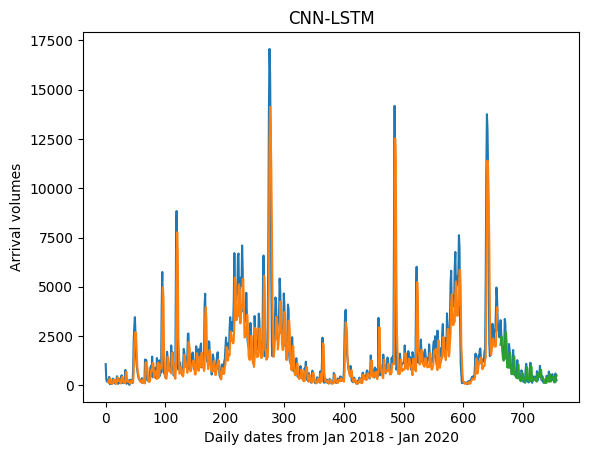

In [41]:
plt.plot(sig_ds)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("Daily dates from Jan 2018 - Jan 2020")
plt.ylabel("Arrival volumes")
plt.title("CNN-LSTM")
plt.show()

In [42]:
X_train = X_train.reshape((X_train.shape[0], n_seq, 1, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0],n_seq,1,n_steps,n_features))

In [43]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [44]:
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [45]:
yhat_train = model.predict(X_train,verbose=0)

In [46]:
yhat_test = model.predict(X_test,verbose=0)

In [47]:
train_score = math.sqrt(mean_squared_error(Y_train, yhat_train[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 1124.11 RMSE


In [48]:
test_score = math.sqrt(mean_squared_error(Y_test, yhat_test[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 411.38 RMSE


In [49]:
train_mape = mean_absolute_percentage_error(Y_train, yhat_train[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.46 MAPE


In [50]:
test_mape = mean_absolute_percentage_error(Y_test, yhat_test[:, 0])
print('Test score: %.2f MAPE' %(test_mape))

Test score: 0.52 MAPE


In [51]:
sg_predicted = np.array(sig_ds,dtype='f')

In [52]:
trainPredictPlot = np.empty_like(mc_predicted)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[4:len(yhat_train)+4, :] = yhat_train

In [53]:
testPredictPlot = np.empty_like(mc_predicted)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(4*2):len(mc_predicted), :] = yhat_test

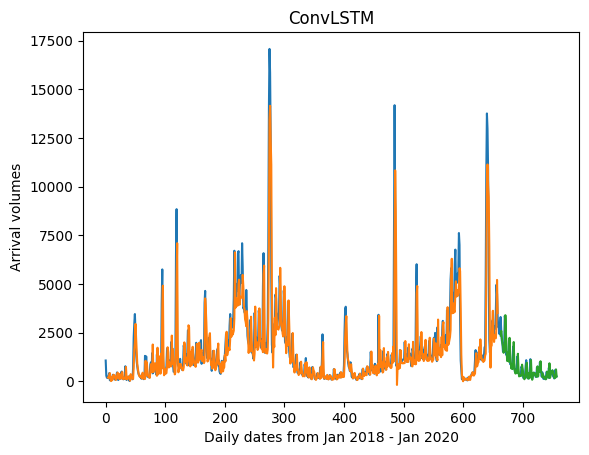

In [54]:
plt.plot(sig_ds)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("ConvLSTM")
plt.xlabel("Daily dates from Jan 2018 - Jan 2020")
plt.ylabel("Arrival volumes")
plt.show()